# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, You'll practice your knowledge on correlation, autocorrelation and the ACF and PACF.

## Objectives

You will be able to:
- Understand correlation in Time Series
- Plot and discuss the autocorrelation function (ACF) for a time-series 
- Plot and discuss the partial autocorrelation function (PACF) for a time-series 
- Interpret ACF and PACF and Identify use cases both functions

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. First, import the necessary libraries for time series and plotting. Then import the data (in `exch_rates.csv`) and make sure it's set in the correct time series format with the `datetime` as the index.

In [1]:
# your code here
import pandas as pd
data = pd.read_csv('exch_rates.csv')
data.head()

,Frequency,Euro,Australian Dollar,Danish Krone
0,2000-01-01,NaN,NaN,NaN
1,2000-01-02,NaN,NaN,NaN
2,2000-01-03,0.991080,1.520912,7.374034
3,2000-01-04,0.970403,1.521300,7.222610
4,2000-01-05,0.964506,1.521316,7.180170


In [2]:
# your code here
data.Frequency = pd.to_datetime(data.Frequency)
data.set_index(data.Frequency, inplace=True)

In [6]:
data.drop('Frequency',axis=1, inplace = True)

Plot the three exchange rates in one plot

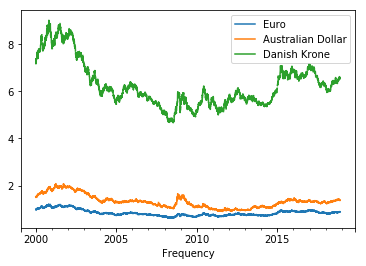

In [8]:
# your code here
data.plot(subplots=False)

You can see that the EUR/USD and AUD/USD exchange rate are somewhere between rougly 0.5 and 2 between 2000 and 2018, where the Danish Krone is somewhere between roughly 4.5 and 9. Now let's look at the correlations between these time series.

In [9]:
# your code here
data.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


### What is your conclusion here? You might want to use outside resources to understand what's going on.

In [10]:
# The exchange rates for Euro and the Australian dollar are highly correlated, 
# but there are differences. The Euro and the Danish Krone, however, is perfectly correlated. 
# If you do further research you'll notice that the Danish Krone is pegged to the Euro, 
# which means that they are basically designed to perfectly correlate together! 
# The fact that the value is just very, very close to 1 is due to rounding errors.

Next, look at the plots of the differenced series. Use subplots to plot them rather than creating just one plot.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024E5ADB9DA0>,
      dtype=object)

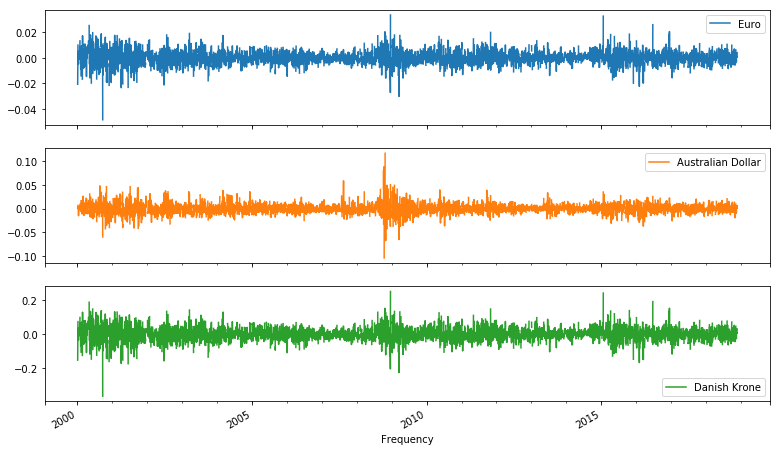

In [14]:
# your code here
data_diff = data.diff(periods = 1)
data_diff.plot(figsize =(13,8), subplots=True, legend = True)

In [15]:
# your code here
data_diff.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.545369,0.999667
Australian Dollar,0.545369,1.000000,0.545133
Danish Krone,0.999667,0.545133,1.000000


In [16]:
data.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


### Explain what's going on

In [17]:
# Differencing the series here led to a decrease 
# in correlation between the EUR/USD and AUD/USD series. 
# If you think a little further, this makes sense: in the lecture before, 
# the high correlation was a result of seasonality. 
# Differencing led to a decrease in correlation between series, 
# here the series are moving in the (more or less) same direction 
# on a day-to-day basis and seasonality is not present, hence this result.

Next, let's look at the "lag 1 autocorrelation" for the EUR/USD exchange rate. Create a "lag 1 autocorrelation" series, plot the result, and look at the correlation coefficient.

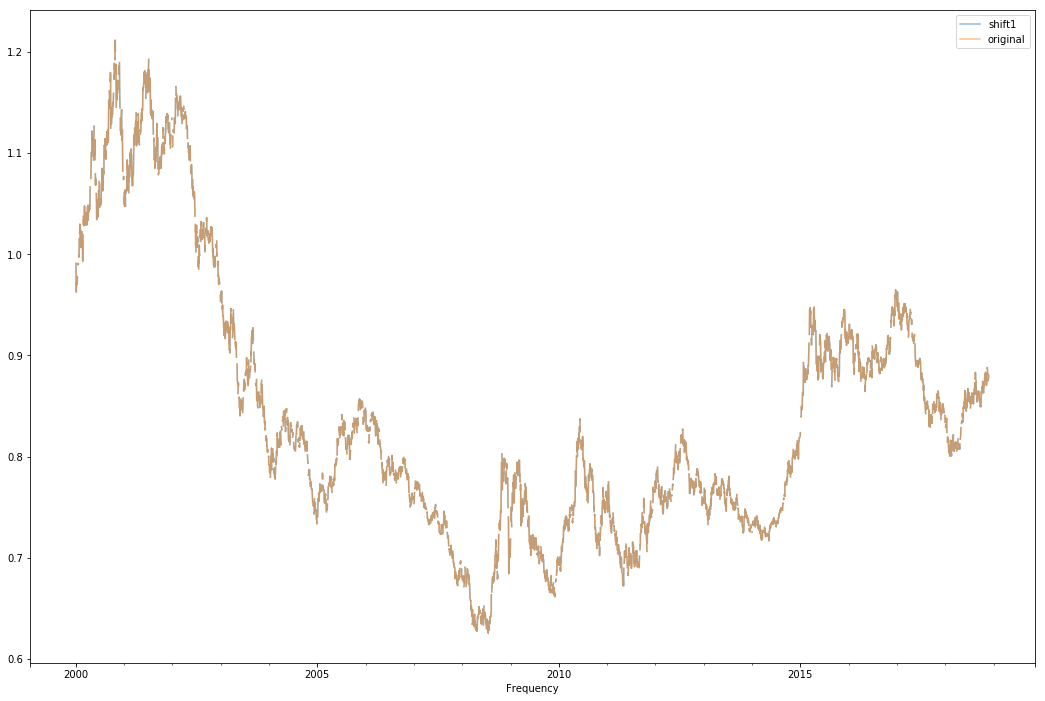

In [36]:
euro = data.Euro
euro_shift_1 = euro.shift(periods =1)
lag_1 = pd.concat([euro_shift_1,euro], axis =1)
lag_1.columns=['shift1', 'original']
lag_1.plot(figsize=(18,12), alpha =0.5)

In [37]:
lag_1.corr()

,shift1,original
shift1,1.000000,0.999146
original,0.999146,1.000000


Repeat this, but for a "lag 5 autocorrelation"

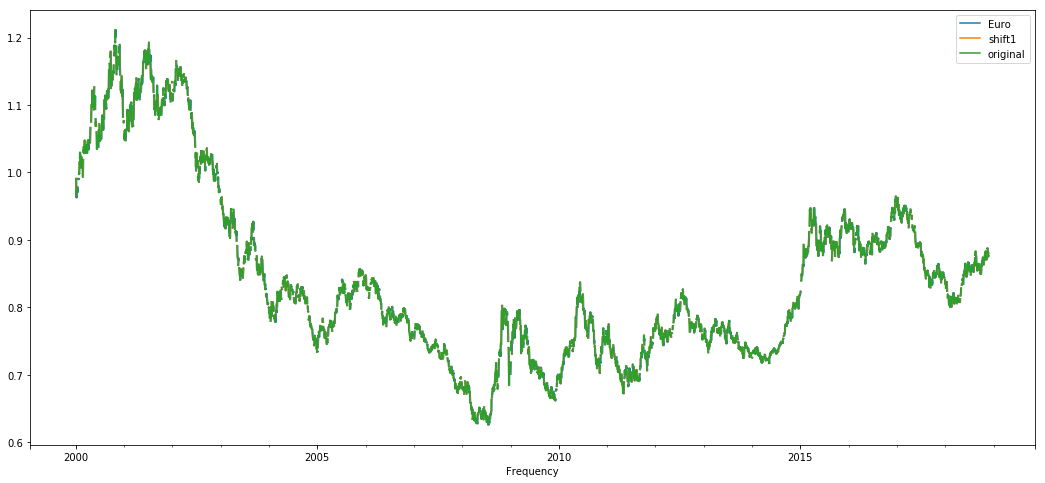

In [43]:
# your code here
euro_shift_5 = euro.shift(periods =5)
euro_shift_5.columns =['shift5']
lag_5 = pd.concat([euro_shift_5, lag_1], axis =1)
lag_5.plot(figsize=(18,8))


In [44]:
lag_5.corr()

,Euro,shift1,original
Euro,1.000000,0.997753,0.997518
shift1,0.997753,1.000000,0.999146
original,0.997518,0.999146,1.000000


### What's your conclusion here?

In [45]:
# Autocorrelation is very high in these time series, even up to a lag as big as 50! 
# This is no big surprise though: remember that these are random walk series, 
# which are highly recursive, as each value depends heavily on the previous one!

Knowing this, let's plot the ACF now.

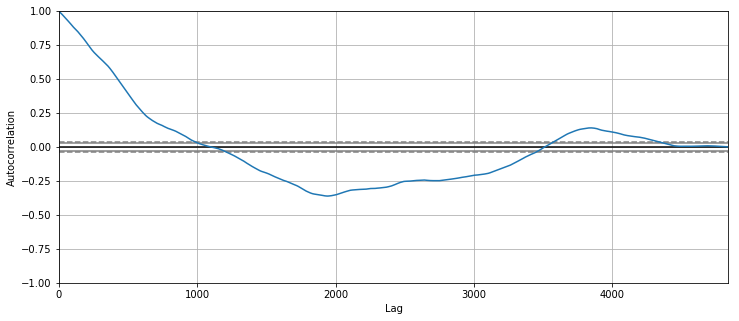

In [46]:
# your code here
import matplotlib.pyplot as plt
plt.figure(figsize =(12,5))
pd.plotting.autocorrelation_plot(euro.dropna())

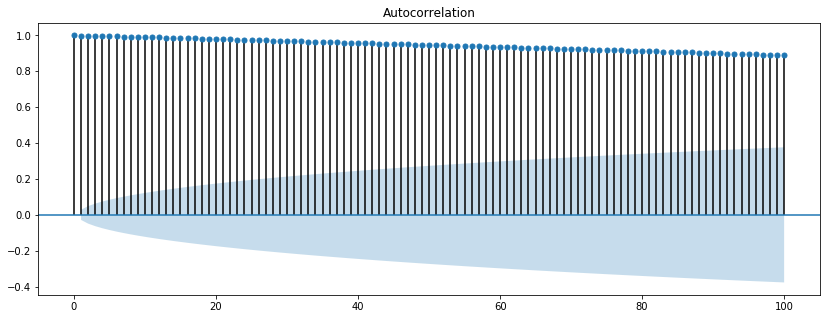

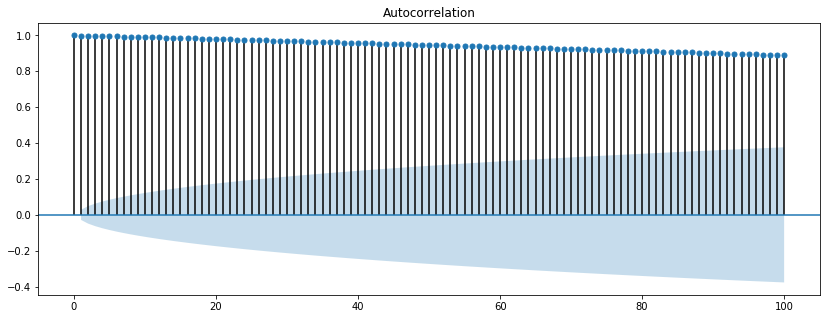

In [52]:
# your code here
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 14, 5

plot_acf(euro.dropna(), lags =100)

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is **a random walk**, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the Partial Autocorrelation Function.

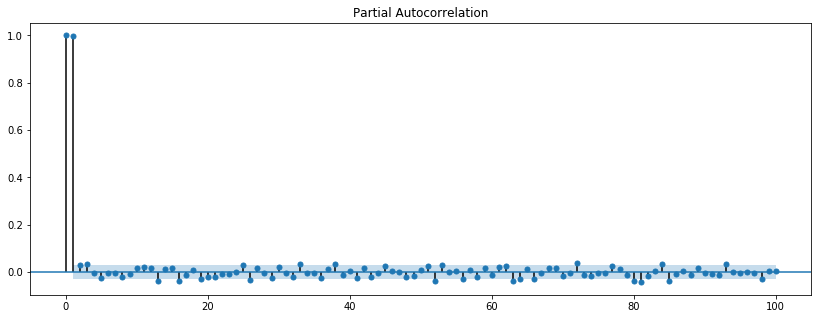

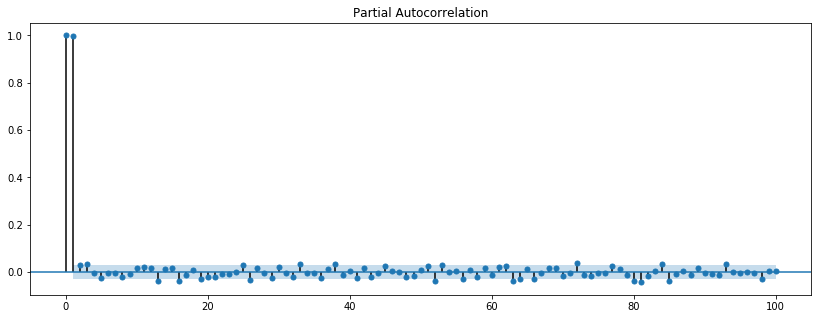

In [55]:
# your code here
# from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 14, 5
# plot_pacf(euro.dropna(), lags =100, method='ywm')
plot_pacf(euro.dropna(), lags =100)

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period lags, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for Random Walk series!

## The Airpassenger Data

Look at ACF and PACF for the airpassenger data and describe the result `passengers.csv`. Do this both for the differenced and regular series.

In [76]:
# your code here
air = pd.read_csv('passengers.csv')
air.Month = pd.to_datetime(air.Month)
air.set_index('Month', inplace =True)
air_diff = air.diff(periods =1)

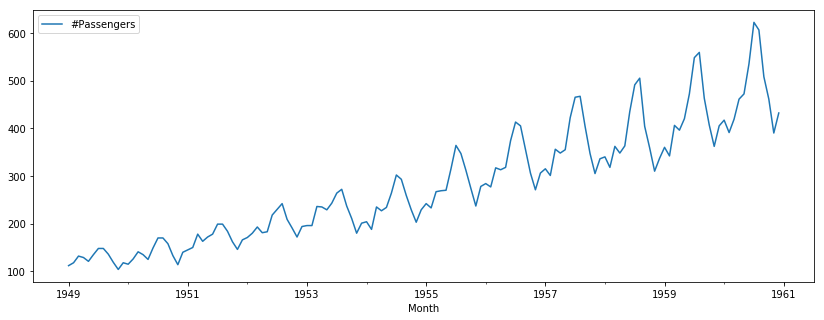

In [77]:
# your code here
air.plot()

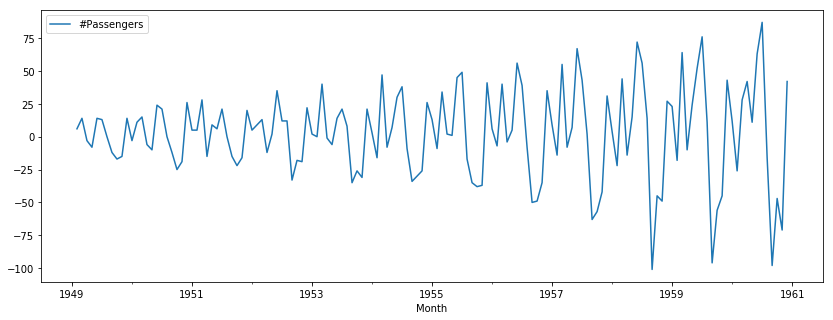

In [78]:
# your code here
air_diff.plot()

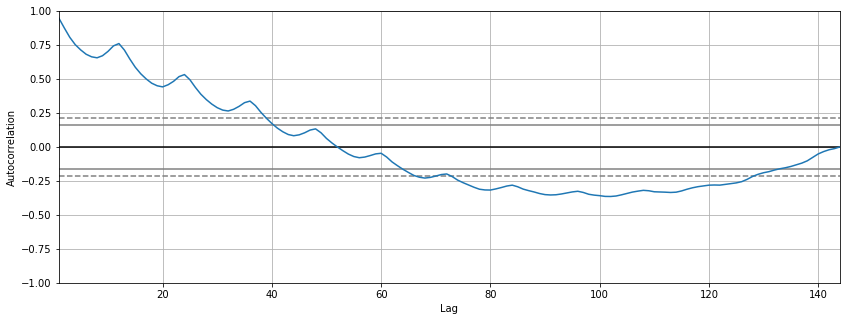

In [80]:
# your code here
pd.plotting.autocorrelation_plot(air)

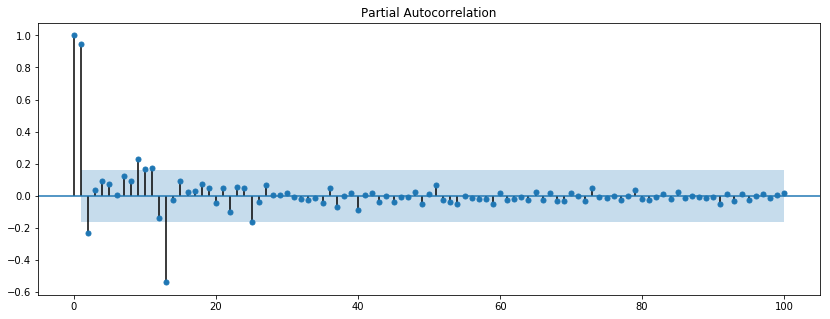

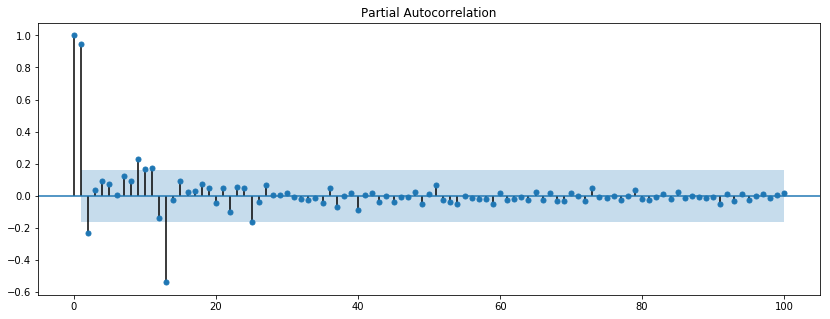

In [82]:
# your code here
rcParams['figure.figsize']=14,5
plot_pacf(air.dropna(), lags = 100, method='ywm')

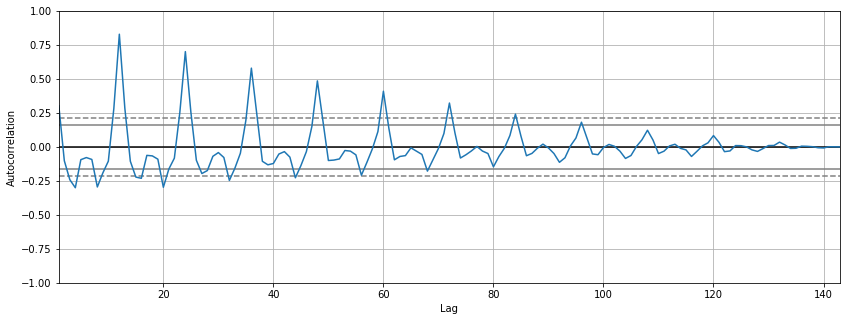

In [84]:
# your code here
pd.plotting.autocorrelation_plot(air_diff.dropna())

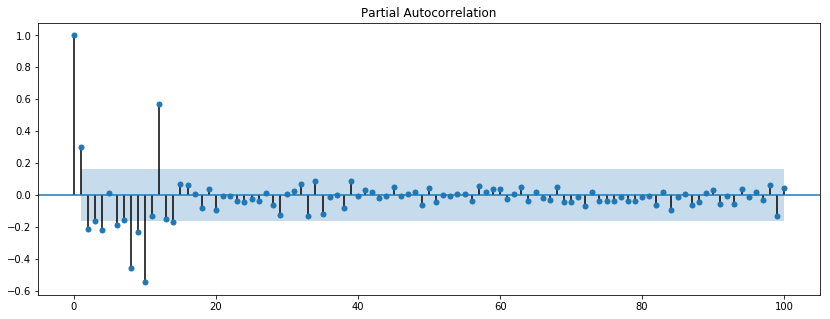

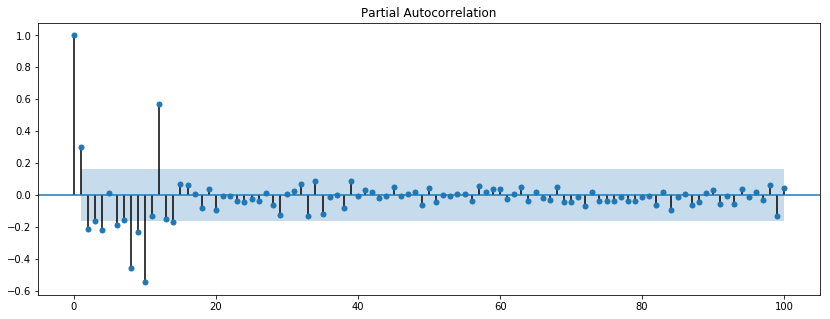

In [90]:
# your code here
rcParams['figure.figsize']= 14, 5
plot_pacf(air_diff.dropna(),lags=100,method='ywm')

### Your conclusion here

In [ ]:
# The result reminds us a lot of the google trends data. 
# The seasonality is much more clear in the differenced time series. 
# The PACF has just one very strong correlation, right at 12 months.

## The NYSE data

Look at correlation and autocorrelation functions for the NYSE data ("NYSE_monthly.csv")

In [92]:
# your code here
nyse = pd.read_csv('NYSE_monthly.csv')
nyse.Month = pd.to_datetime(nyse.Month)
nyse.set_index('Month',inplace =True)

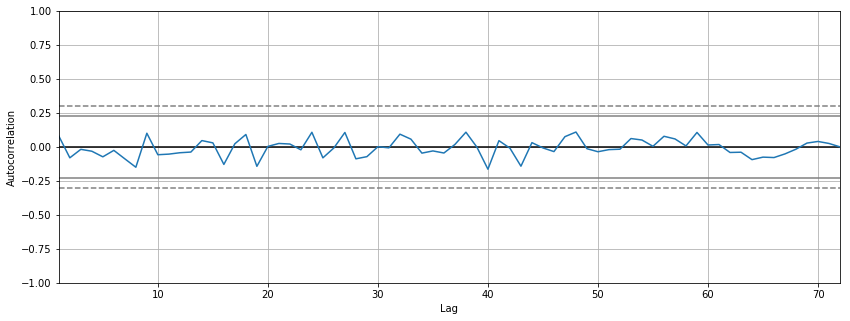

In [95]:
# your code here
pd.plotting.autocorrelation_plot(nyse.dropna())

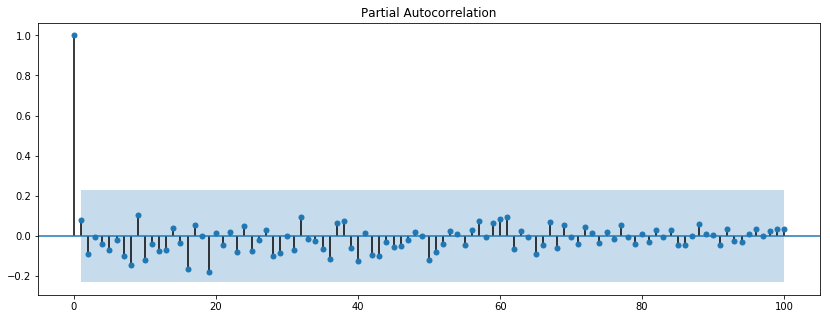

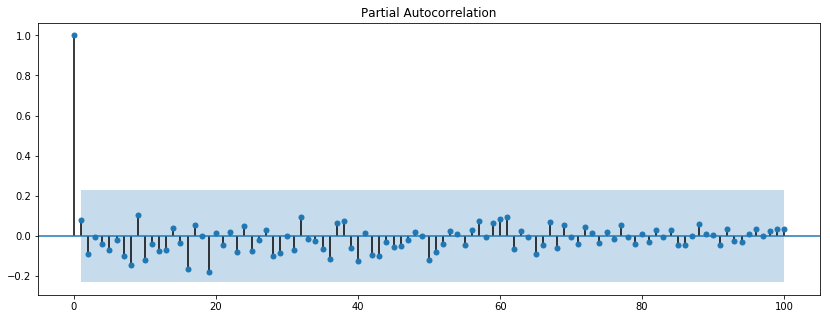

In [96]:
# your code here
plot_pacf(nyse.dropna(), lags = 100, method='ywm')

## Your conclusion here

In [97]:
# Autocorrelations and partial autocorrelations are virtually 0 for any lag. 
# This is no surprise! The NYSE series was a white noise series, meaning there is no trend or no seasonality! 
# This is, again, a typical result for these kind of series.



## Summary

Great, you've now been introduced to correlation, the ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!